In [1]:
from google.colab import files
upload_files = files.upload()

Saving Air to Fuel Ratio GTG-B r 2.xlsx to Air to Fuel Ratio GTG-B r 2.xlsx


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow as tf
import openpyxl
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [7]:
data = pd.read_excel('Air to Fuel Ratio GTG-B r 2.xlsx', sheet_name='GTG-B')
data = data.iloc[10:8000, :].values
a=data

In [30]:
def neural():
    data = pd.read_excel('Air to Fuel Ratio GTG-B r 2.xlsx', sheet_name='GTG-B')
    data = data.iloc[10:8000, :].values
    us = data[:7000, 1:9]
    ys = data[:7000, 9:12]
    uv = data[7000:, 1:9]
    yv = data[7000:, 9:12]

    us =tf.convert_to_tensor(us , dtype=tf.float32)
    ys =tf.convert_to_tensor(ys , dtype=tf.float32)
    uv =tf.convert_to_tensor(uv , dtype=tf.float32)
    yv =tf.convert_to_tensor(yv , dtype=tf.float32)

    min_us = np.min(us, axis=0)
    max_us = np.max(us, axis=0)
    min_ys = np.min(ys, axis=0)
    max_ys = np.max(ys, axis=0)

    us = (us - min_us) / (max_us - min_us) * 2 - 1
    ys = (ys - min_ys) / (max_ys - min_ys) * 2 - 1
    uv = (uv - min_us) / (max_us - min_us) * 2 - 1
    yv = (yv - min_ys) / (max_ys - min_ys) * 2 - 1

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(3)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # Use early stopping to stop training when the validation loss stops improving
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # Train the model on the training data
    model.fit(us, ys, epochs=100, validation_data=(uv, yv), callbacks=[early_stopping])

    # Use the trained model to make predictions
    model.save("/content/hasil_predict.h5")
    return min_us,max_us,min_ys,max_ys




def integrationGTGB(a,x,yhat):
    # Define input and output matrices
    ut = a[3:7000, 1:9].T
    yt = a[3:7000, 9:12].T

    uv = a[7000:8000, 1:9].T
    yv = a[7000:8000, 9:12].T

    us = a[3:8000, 1:9].T
    ys = a[3:8000, 9:12].T

    # Normalize input data
    maxus = np.max(us, axis=1)
    minus = np.min(us, axis=1)
    
    max_ys = np.max(ys, axis=1)
    min_ys = np.min(ys, axis=1)

    rowv, colv = uv.shape
    rowu, colu = ut.shape
    rowy, coly = yt.shape

    #for i in range(rowy):
    #    yt[i,:] = ((2/(np.max(ys[i,:])-np.min(ys[i,:])))*(yt[i,:]-np.min(ys[i,:])))-1
  #      yv[i,:] = ((2/(np.max(ys[i,:])-np.min(ys[i,:])))*(yv[i,:]-np.min(ys[i,:])))-1


  #  for i in range(rowu):
   #     x[i] = ((2/(maxus[i]-minus[i]))*(x[i]-minus[i]))-1

    #x = x.reshape((len(x), 1))

    # Initialize yhat
    
    #yhat[1] =random.random()
    #yhat[1] =0
    # De-normalize output
    yt = (max_ys[1] - min_ys[1]) *((yhat[1] + 1) / 2 ) + min_ys[1]
    if yt < 0 or yt > 1:
        yt = 0
    else:
        yt = yt

    return yt



In [31]:
import tensorflow as tf
import openpyxl
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


min_us,max_us,min_ys,max_ys = neural()

Epoch 1/100
219/219 [==============================] - 2s 8ms/step - loss: 0.0063 - accuracy: 0.7806 - val_loss: 0.0012 - val_accuracy: 0.7707
Epoch 2/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0011 - accuracy: 0.7926 - val_loss: 0.0011 - val_accuracy: 0.8030
Epoch 3/100
219/219 [==============================] - 2s 9ms/step - loss: 9.0103e-04 - accuracy: 0.7919 - val_loss: 9.5099e-04 - val_accuracy: 0.7980
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 8.3014e-04 - accuracy: 0.7927 - val_loss: 8.0314e-04 - val_accuracy: 0.8000
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 7.3070e-04 - accuracy: 0.7950 - val_loss: 7.2043e-04 - val_accuracy: 0.8172
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 6.4902e-04 - accuracy: 0.7871 - val_loss: 5.4937e-04 - val_accuracy: 0.8040
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 3.6615e-04 - accuracy: 0.8024 - val

In [14]:
def integrationfian(x):
    model = tf.keras.models.load_model('/content/hasil_predict.h5')
    x = np.array([x])
    y=[]
    y.append(x)
    u = np.array([y])   #8x
    u = np.array(u, dtype=np.float32)
    yhat =tf.convert_to_tensor(x , dtype=tf.float32)
    yhat=((yhat-min_us)/ (max_us - min_us) )* 2 - 1
    yhat = model.predict(yhat)[0]
    hasil = integrationGTGB(a,u,yhat)
    return hasil

In [15]:
import random
x= np.array([7.27,	7.08,	0.140833333,	845,	25.1,	45.2,	12,	1.54990616])

hasil = integrationfian(x)
print(hasil)


1/1 [==============================] - 0s 61ms/step
0.93484375


dimensi input (8,)
1/1 [==============================] - 0s 97ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 85ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 89ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 86ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 85ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 56ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 50ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 58ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 57ms/step
hasil output fitness 0.93484375
dimensi input (8,)
1/1 [==============================] - 0s 55ms/step
ha

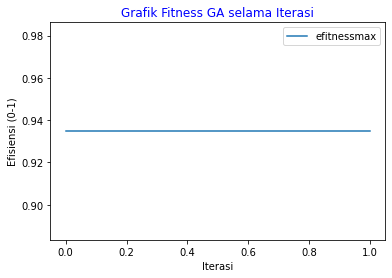

In [16]:
import tensorflow as tf
import openpyxl
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt

Npop = 10 #populasi
Maxit = 2 #iterasi
el = 0.05 #elitism
Pc = 0.8 #probabilitas crossover
Pm = 0.1 #probabilitas mutasi
Nvar = 8 #jumlah variabel desain yang dioptimasi
Nbit = 20 #jumlah bit

rb = [5.95, 5.83, 0, 0, 0, 8.3, 9.7, 0]
ra = [8.11, 8.38, 0.406944444, 3063, 51.5, 89, 14.5, 4.224140413]

eBangkit = []
Individu = []
eIndividu = []
david = []
Dadatfit = []
Datfit = []
summary = []
eDadatfit = []
efitnessmax = []
eIndividuMax = []

Bangkit = np.round(np.random.rand(Npop, Nbit * Nvar))
popsize = Bangkit.shape[0]
batas = np.zeros((Nvar))
for i in range(Nvar):
    batas[i] = ra[i] - rb[i]

Desimal = np.zeros((Npop, Nvar))
Individu = np.zeros((Npop, Nvar))
for i in range(Npop):
    for j in range(Nvar):
        slice = Bangkit[i][((j*Nbit)-(Nbit-1)):(j*Nbit)]
        binary_representation = ''.join(map(lambda x: '1' if x >= 0.5 else '0', slice))
        if binary_representation:
            Desimal[i][j] = int(binary_representation, 2)
        else:
            Desimal[i][j] = 0
        Individu[i][j] = (Desimal[i][j] * batas[j] - batas[j] + rb[j]) / (2**Nbit - 1)

############## Masih Perlu perbaikan Batas Atas###############
Datfit = []
for i in range(Individu.shape[0]):
    print(f"dimensi input {Individu[i, :].shape}")
    fitness = integrationfian(Individu[i, :])
    print(f"hasil output fitness {fitness}")
    #print(Individu[i, :])
    Datfit.append(fitness)

if Datfit:
    fitemax = np.max(Datfit)
    nmax = np.argmax(Datfit)
############## Masih Perlu perbaikan Batas Bawah###############
Dadatfit = []
Prob = np.zeros_like(Datfit)
for generasi in range(1, Maxit+1):
    print(f"Generasi ke {generasi}")
    if generasi > 1:
        sortfit = np.random.rand(Npop, Nbit * Nvar + 1)
        Individu1 = sortfit[int((1-el)*Npop):Npop,:]
        remain = sortfit[int(el*Npop):Npop,:]
        X = Individu1
        M = X.shape[0]

        sumfitness = sum(Datfit)
        Prob = [Datfit[i]/sumfitness for i in range(M)]
        for i in range(1, M):
            Prob[i] = Prob[i] + Prob[i-1]

        Xparents = np.zeros((M, X.shape[1]))
        for i in range(M):
            n = np.random.rand()
            k = 0
            for j in range(M-1):
                if n > Prob[j].any():
                    k = j + 1
            Xparents[i,:] = X[k,:]

#crossover
        M, d = Xparents.shape
        Xcrossed = Xparents.copy()
        for i in range(0, M-1, 2):
            c = np.random.rand()
            if c <= Pc:
                p = np.ceil((d-1) * np.random.rand())
                p = int(p)
                Xcrossed[i, :] = np.concatenate((Xparents[i, 0:p], Xparents[i+1, p:d]))
                Xcrossed[i+1, :] = np.concatenate((Xparents[i+1, 0:p], Xparents[i, p:d]))

        if M % 2 != 0:
            c = np.random.rand()
            if c <= Pc:
                p = np.ceil((d-1) * np.random.rand())
                p = int(p)
                str = np.ceil((M-1) * np.random.rand())
                str = int(str)
                Xcrossed[M-1, :] = np.concatenate((Xparents[M-1, 0:p], Xparents[str, p:d]))
    
###mutasi
        Xnew = Xcrossed
        [M, d] = np.shape(Xcrossed)
        for i in range(M):
            for j in range(d):
                p = np.random.rand()
                if p <= Pm:
                    Xnew[i][j] = 1 - Xcrossed[i][j]
        print(f'New fitness calculation:{generasi}')
        Bangkit = np.concatenate((Xnew[:, :Nbit*Nvar], remain[:, :Nbit*Nvar]))
    #eBangkit = Bangkit
    for i in range(Npop):
        for j in range(Nvar):
            slice = Bangkit[i][((j*Nbit)-(Nbit-1)):(j*Nbit)]
            binary_representation = ''.join(map(lambda x: '1' if x >= 0.5 else '0', slice))
            if binary_representation:
                Desimal[i][j] = int(binary_representation, 2)
            else:
                Desimal[i][j] = 0
            Individu[i][j] = (Desimal[i][j] * batas[j] - batas[j] + rb[j]) / (2**Nbit - 1)
    
############## Masih Perlu perbaikan Batas Atas###############
    Datfit = []
    for i in range(Npop):
        print(f"dimensi input {Individu[i, :].shape}")
        fitness = integrationfian(Individu[i,:])
        print(f"hasil output fitness {fitness}")
        Datfit.append(fitness)
    
############## Masih Perlu perbaikan Batas Bawah###############
    
    fitemax = np.max(Datfit)
    nmax = np.argmax(Datfit)
    nmax=100
    Dadatfit = Datfit
    eDadatfit.append(Dadatfit)
    eIndividu.append(Individu)
    fitnessmax = np.max(eDadatfit)
    nmax = np.argmax(eDadatfit)
    efitnessmax.append(fitnessmax)
    #BangkitMax = eBangkit[int(nmax), :]
    #IndividuMax = eIndividu[int(nmax), :]
    #eIndividuMax.append(IndividuMax)
    #BangkitMaxlast = BangkitMax
    #schedmax = BangkitMax
    #sort = [Bangkit, Dadatfit]
    #summary.append(sort)
    #david.append(Dadatfit)

#Optimum_variable_design = eIndividuMax[0, :]
#Optimum_objective_function = fitness[0, :]

#AFR = eIndividuMax[0, 8] / eIndividuMax[0, 3]


plt.title('Grafik Fitness GA selama Iterasi', color='b')
plt.xlabel('Iterasi')
plt.ylabel('Efisiensi (0-1)')
plt.plot(efitnessmax, label='efitnessmax')
plt.legend()
plt.show()

